In [25]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [26]:
data = pd.read_csv('Food_Delivery_Times.csv',usecols=["Distance_km","Weather","Traffic_Level","Time_of_Day","Vehicle_Type","Preparation_Time_min","Courier_Experience_yrs","Delivery_Time_min"])
data.head(10)

,Distance_km,Weather,Traffic_Level,Time_of_Day,Vehicle_Type,Preparation_Time_min,Courier_Experience_yrs,Delivery_Time_min
0,7.93,Windy,Low,Afternoon,Scooter,12,1.0,43
1,16.42,Clear,Medium,Evening,Bike,20,2.0,84
2,9.52,Foggy,Low,Night,Scooter,28,1.0,59
3,7.44,Rainy,Medium,Afternoon,Scooter,5,1.0,37
4,19.03,Clear,Low,Morning,Bike,16,5.0,68
5,19.40,Clear,Low,Evening,Scooter,8,9.0,57
6,9.52,Clear,Low,NaN,Bike,12,1.0,49
7,17.39,Clear,Medium,Evening,Scooter,5,6.0,46
8,1.78,Snowy,Low,Evening,Car,20,6.0,35
9,10.62,Foggy,Low,Evening,Scooter,29,1.0,73


In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Distance_km             1000 non-null   float64
 1   Weather                 970 non-null    object 
 2   Traffic_Level           970 non-null    object 
 3   Time_of_Day             970 non-null    object 
 4   Vehicle_Type            1000 non-null   object 
 5   Preparation_Time_min    1000 non-null   int64  
 6   Courier_Experience_yrs  970 non-null    float64
 7   Delivery_Time_min       1000 non-null   int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 62.6+ KB


In [28]:
# first we will check for missing values
data.isna().sum()
data['Traffic_Level'].value_counts()

Traffic_Level
Medium    390
Low       383
High      197
Name: count, dtype: int64

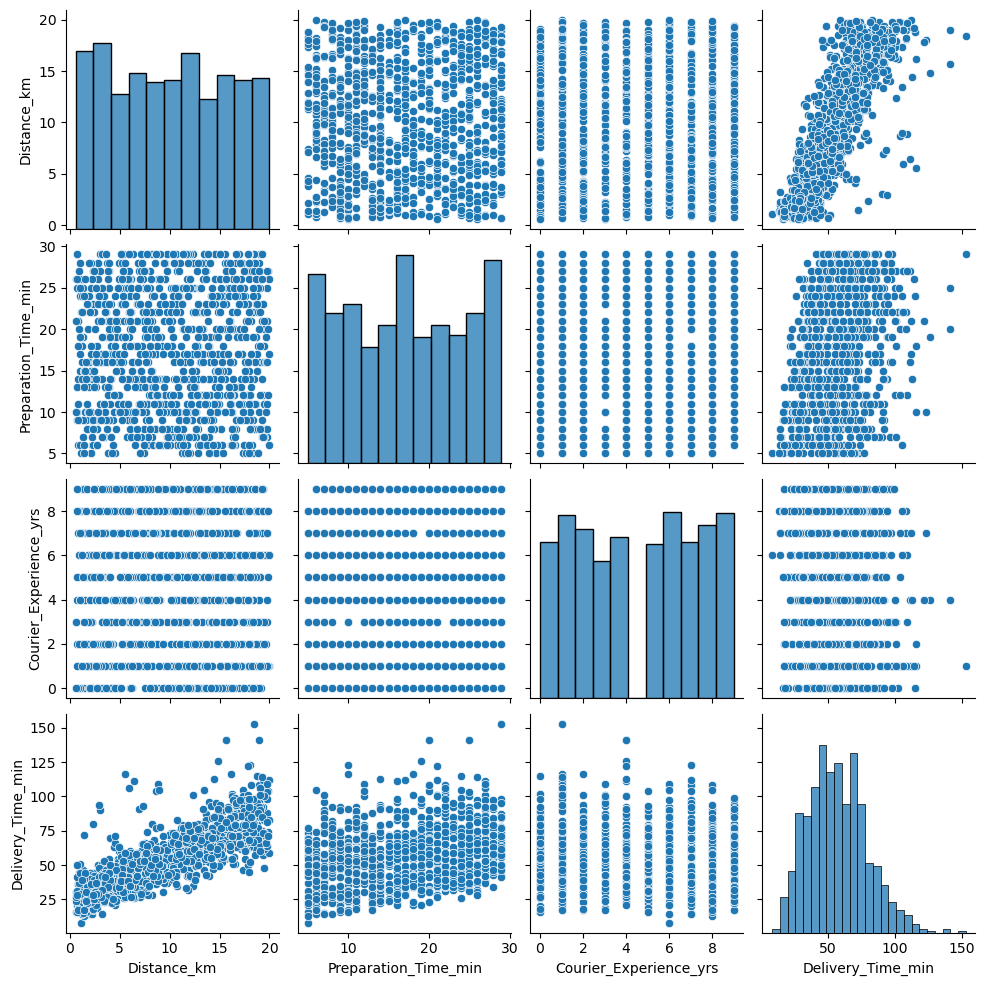

In [29]:
sns.pairplot(data)

In [30]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(data.drop('Delivery_Time_min',axis=1),data['Delivery_Time_min'],test_size=0.2,random_state=2)
X_train.head()

,Distance_km,Weather,Traffic_Level,Time_of_Day,Vehicle_Type,Preparation_Time_min,Courier_Experience_yrs
175,11.14,Rainy,Medium,Morning,Scooter,7,3.0
818,10.13,Clear,Medium,Evening,Bike,22,0.0
677,16.62,Snowy,Low,Afternoon,Bike,26,8.0
952,11.65,Windy,Low,Night,Bike,10,3.0
200,1.41,Foggy,Medium,Evening,Bike,15,0.0


In [31]:
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,OneHotEncoder,OrdinalEncoder
from sklearn.linear_model import LinearRegression
num_features = ['Distance_km','Preparation_Time_min','Courier_Experience_yrs']
num_trf = Pipeline(steps=[
    ('imputer',SimpleImputer()),
    ('scaler',StandardScaler())
])
cat_ord_features = ['Traffic_Level']
cat_nominal_features = ['Weather','Time_of_Day','Vehicle_Type']

cat_nom_trf = Pipeline(steps=[
    ('imputer2',SimpleImputer(strategy='most_frequent')),
    ('ohe',OneHotEncoder(handle_unknown='ignore'))
])
cat_ord_trf = Pipeline(steps=[
    ('imputer3',SimpleImputer(strategy='most_frequent')),
    ('ord',OrdinalEncoder(categories=[['Low','Medium','High']]))
])

preprocessor = ColumnTransformer(transformers=[
    ('num',num_trf,num_features),
    ('cat_ord',cat_ord_trf,cat_ord_features),
    ('cat_nom',cat_nom_trf,cat_nominal_features)
],remainder='passthrough')

In [32]:
model = Pipeline(steps=[
    ('preprocess',preprocessor),
    ('model',LinearRegression())
])

In [33]:
from sklearn import set_config

set_config(display='diagram')
model

Pipeline(steps=[('preprocess',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Distance_km',
                                                   'Preparation_Time_min',
                                                   'Courier_Experience_yrs']),
                                                 ('cat_ord',
                                                  Pipeline(steps=[('imputer3',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ord',
                                                                   OrdinalEncoder(categories=[['Low',
                                                                                               'Medium',
                                                                                               'High']]))]),
                                                  ['Traffic_Level']),
                                                 ('cat_nom',
                                                  Pipeline(steps=[('imputer2',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Weather', 'Time_of_Day',
                                                   'Vehicle_Type'])])),
                ('model', LinearRegression())])

In [34]:
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
from sklearn.metrics import accuracy_score,r2_score
# print(f"Accuracy: {accuracy_score(y_test,y_pred)}")
print(f"R2 score: {r2_score(y_test,y_pred)}")

R2 score: 0.7862589289647332
